# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Advertising.csv',index_col=0)
df.head() # посмотрим на корректность загрузки

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) # отобразим количество пропусков в процентах

Series([], dtype: float64)

В данных нет пропусков

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [4]:
X = np.array(df[['TV', 'radio', 'newspaper']]) # предикаторы
y = np.array(df['sales']) # целевая переменная

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [5]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [6]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [7]:
w = np.zeros(X.shape[1])

for i in range(1000):
    r = y - X.dot(w)
    for j in range(len(w)):
        r = r + X[:, j] * w[j]
        w[j] = X[:, j].dot(r)
        r = r - X[:, j] * w[j]
print('Веса модели ручной: ', w)

Веса модели ручной:  [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [8]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print('Веса модели из sklearn: ', model.coef_)

Веса модели из sklearn:  [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Веса моделей полученные из библиотеки sklearn и при помощи ручной реализации совпадают. 

Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [9]:
# дублируем определение X, для того чтобы обнулить предыдущую нормализацию
X = np.array(df[['TV', 'radio', 'newspaper']]) 
X = (X - np.mean(X))/np.std(X)

**Добавим единичный столбец**

In [10]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [11]:
# Функция для расчета среднеквадратичной ошибки
def mse_error(y, y_pred):
    MSE = np.mean((y.T-y_pred)**2)
    return MSE

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [12]:
y_pred = np.ones(y.shape[0])*np.mean(y)
print(f'Среднеквадратичная ошибка наивного прогноза: {mse_error(y, y_pred)}')

Среднеквадратичная ошибка наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [13]:
# Функция предсказания
def lin_pred(X, w):
    y_pred = np.dot(X, w)
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [77]:
def stoch_grad_step(X, y, w, train_ind, eta):
    l = X[train_ind].size/X[train_ind].shape[0] # количество строк в выборке, в данном случае всегда 1
    # предсказание
    y_pred = lin_pred(X[train_ind], w)
    # направление изменения
    delta = (2 * np.dot(X[train_ind], (y_pred - y[train_ind])))/l
    # обновленный вектор весов
    w_new = w - delta*eta
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте основной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [78]:
def stochastic_gradient_descent(X, y, w, learn_rate, iter, eps):
    dist = 1e100
    errors = []
    i = 0
    
    while  i < iter and dist > eps:
        # генерация случайного индекса
        rand_index = np.random.randint(0, y.shape[0])
        # предсказание
        y_pred = lin_pred(X, w)
        # добавление текущей ошибки в список
        errors.append(mse_error(y, y_pred))
        # расчет нового вектора весов
        w_new = stoch_grad_step(X, y, w, rand_index, learn_rate)
        # расчет расстояния между векторами весов 
        dist = np.linalg.norm(w - w_new)
        # обновление вектора весов
        w = w_new
        
        # промежуточная проверка
        # print('Weight: ', w)
        # print('Iter: ', i)
        # print('dist: ', dist)
        
        i += 1
    
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

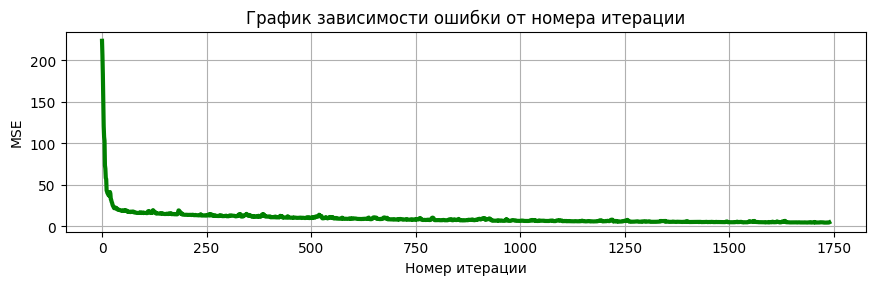

In [79]:
w0 = np.zeros(X.shape[1])
w, mse = stochastic_gradient_descent(X, y, w0, 0.01, 100000, 0.0001)

fig = plt.figure(figsize=(8, 2))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(
    mse,
    color="green",
    lw=3,
)
axes.set_title("График зависимости ошибки от номера итерации")
axes.set_xlabel('Номер итерации')
axes.set_ylabel('MSE')
axes.grid()

**Выведите вектор весов, к которому сошелся метод.**

In [80]:
print('Вектор весов: ', w)

Вектор весов:  [15.08866306  3.91455167  7.35517977  1.06292461]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [81]:
print('Last MSE: ', mse[-1].round(3))

Last MSE:  4.821


## Реализация стохастического градиентного спуска в библиотеке sklearn

In [86]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

model = SGDRegressor(max_iter=10000, tol=.0001, eta0=0.01) 
model.fit(X, y)
predictions = model.predict(X)
mse_sk = mse_error(y, predictions) 
mape_sk = mean_absolute_percentage_error(y, predictions)
print('Вектор весов SGD в sklearn: ', model.coef_)
print('MSE SGD в sklearn: ', round(mse_sk, 3))
print(f'MAPE SGD в sklearn: {round(mape_sk*100, 3)}%')

Вектор весов SGD в sklearn:  [ 8.94062785  3.53089146 13.10681931  0.32623515]
MSE SGD в sklearn:  2.845
MAPE SGD в sklearn: 13.622%


Встроенная в библиотеку модель показала себя лучше рукописной, ее результаты более стабильны и показатель метрики MSE меньше. Метрика MAPE говорит о том, что в среднем модель ошибается в 13-14% предсказаний.